<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_AML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


Pandas is a Python library used for data manipulation and analysis. NumPy is a Python library used for working with arrays.
Scikitlearn is a Python library used for machine learning. Matplotlib is a Python library used for data visualization. Seaborn is a Python library used for statistical graphics plotting.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/program_5_dataset - program_5_dataset.csv')

In [ ]:
data.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.shape

(615, 14)

The shape attribute of a Pandas DataFrame returns a tuple containing the number of rows and columns in the DataFrame. In this case, the DataFrame has 615 rows and 14 columns

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
# Convert 'PROT' and 'CREA' columns to numeric data types
data['PROT'] = pd.to_numeric(data['PROT'], errors='coerce')
data['CREA'] = pd.to_numeric(data['CREA'], errors='coerce')

# Handle any remaining missing values if needed
data.fillna(data.mean(), inplace=True)  # Filling missing values with the mean

The errors='coerce' parameter will replace any non-numeric values with NaN. If there are any remaining missing values, you can handle them using the fillna() method. The fillna() method replaces all NaN values with the mean of the column.

In [ ]:
X = data['CREA'].values.reshape(-1, 1)
y = data['PROT']


The reason for using .values is to access the values of the 'CREA' column from the DataFrame. This allows us to work with the numeric values directly as a numpy array.

The reshape(-1, 1) part of the code is used to ensure that the data is in the expected shape for the model. Specifically, it reshapes the data to have one column and as many rows as necessary to accommodate the original data. This is important because many machine learning models expect the feature data to be in a specific shape, often requiring one column for the features.

In the context of linear regression, this reshaping step is necessary as the model expects the feature data to be in a two-dimensional format, where the first dimension represents the number of samples and the second dimension represents the number of features.

By reshaping the data in this way, we ensure that it is compatible with the expectations of the linear regression model.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler class from the sklearn.preprocessing module in Python. If you’re trying to standardize your data.

In [ ]:
print(data.dtypes)

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
simple_regression_model = LinearRegression()
simple_regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the trained model
y_pred = simple_regression_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Simple Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficient:", simple_regression_model.coef_)
print("Intercept:", simple_regression_model.intercept_)

Simple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 31.659951887601206
R-squared (R2): -0.01050893132580022
Coefficient: [-0.19462189]
Intercept: 71.9362557773351


In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF
selected_columns = data.drop(['Unnamed: 0', 'Category', 'Age', 'Sex'], axis=1)
X_vif = add_constant(selected_columns)
vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
# Finalize the list of predictors based on VIF factor
selected_predictors = vif_data[vif_data < 5]  # Setting a threshold VIF value
# Split the data into train and test datasets
X_final = selected_columns[selected_predictors.index]
y_final = data['PROT']
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
# Step 1: Building a multiple linear regression model
multiple_regression_model = LinearRegression().fit(X_train_final, y_train_final)
# Make predictions using the trained model on the test set with the selected features
y_pred_multiple = multiple_regression_model.predict(X_test_final)

# Calculate evaluation metrics
mse_multiple = mean_squared_error(y_test_final, y_pred_multiple)
r2_multiple = r2_score(y_test_final, y_pred_multiple)

# Print the evaluation metrics
print("Multiple Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse_multiple)
print("R-squared (R2):", r2_multiple)
print("Coefficients:", multiple_regression_model.coef_)
print("Intercept:", multiple_regression_model.intercept_)

Multiple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 1.4407293800719356e-28
R-squared (R2): 1.0
Coefficients: [ 4.54337964e-16  0.00000000e+00 -5.03069808e-17  5.55111512e-17
  1.38777878e-17 -2.39391840e-16  1.28369537e-16  3.98986399e-17
 -9.71445147e-17  1.00000000e+00]
Intercept: 2.842170943040401e-14


In [ ]:

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Category', 'Sex'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(['PROT'], axis=1)
y = data_encoded['PROT']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso()
parameters_lasso = {'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 150]}
lasso_regressor = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Ridge Regression
ridge = Ridge()
parameters_ridge = {'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 150]}
ridge_regressor = GridSearchCV(ridge, parameters_ridge, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Make predictions using the trained models
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluate the models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print("Lasso Regression - Best Parameters:", lasso_regressor.best_params_)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R-squared:", r2_lasso)

print("\nRidge Regression - Best Parameters:", ridge_regressor.best_params_)
print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R-squared:", r2_ridge)

Lasso Regression - Best Parameters: {'alpha': 0.01}
Lasso Regression - Mean Squared Error: 20.83510936973307
Lasso Regression - R-squared: 0.3349938061178671

Ridge Regression - Best Parameters: {'alpha': 1}
Ridge Regression - Mean Squared Error: 20.47300312087267
Ridge Regression - R-squared: 0.3465513599594323


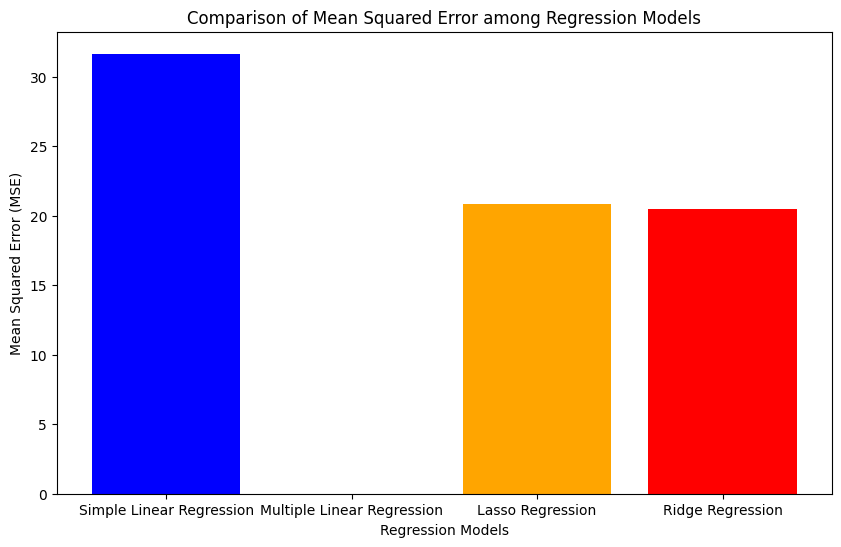

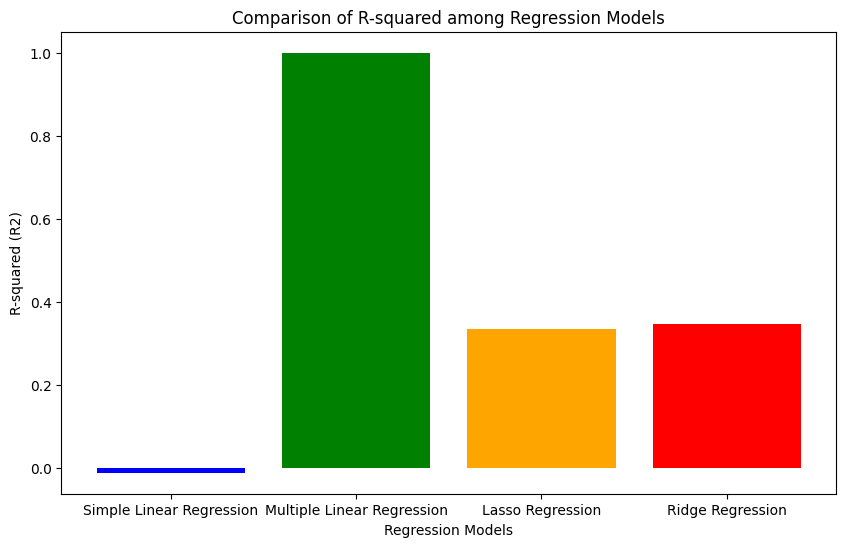

In [ ]:

import matplotlib.pyplot as plt

# Data for plotting
models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression']
mse_values = [mse, mse_multiple, mse_lasso, mse_ridge]
r2_values = [r2, r2_multiple, r2_lasso, r2_ridge]

# Plotting Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error among Regression Models')
plt.show()

# Plotting R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared among Regression Models')
plt.show()

The bar graph is a visual representation of the comparison of the mean squared error (MSE) and R-squared (R2) values among different regression models. The x-axis of both graphs is labeled “Regression Models”. The y-axis of the first graph is labeled “Mean Squared Error (MSE)” and the y-axis of the second graph is labeled “R-squared (R2)”. The bars are colored blue, green, orange, and red respectively. The height of each bar represents the value of the corresponding metric for the respective regression model. The higher the bar, the higher the value of the metric